In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [2]:
from google.colab import drive
drive.mount("/content/drive/" , force_remount = True)

Mounted at /content/drive/


#Loading Dataset

In [3]:
file_name1 = '/content/drive/MyDrive/Self_Project/loan_data_2007_2014.csv.zip'
with ZipFile(file_name1,'r') as zip:
  zip.extractall("/content/data1")
  print('Extracted files at location /content/data1 ')


Extracted files at location /content/data1 


In [4]:
#!unzip '/content/drive/MyDrive/Self_Project/loan_data_2007_2014.csv.zip' -d "/content/data1"

In [5]:
data = pd.read_csv("/content/data1/loan_data_2007_2014.csv" , low_memory = False , index_col = None)

In [6]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Visualization and Pre-Processing

In [7]:
print("Shape of the dataset " , data.shape)
print("No. of rows/Customers in the dataset =" , data.shape[0])
print("No. of columns in the dataset =" , data.shape[1])

Shape of the dataset  (466285, 75)
No. of rows/Customers in the dataset = 466285
No. of columns in the dataset = 75


$\text{Checking datatypes of columns}$

In [8]:
float = 0
int = 0
object = 0
for col in data.columns :
  if data[col].dtype == "float64" :
    float +=1
  elif data[col].dtype == "int64" :
    int += 1
  elif data[col].dtype == "object" :
    object += 1
print(f"Total columns having float64 as datatype= {float} \nTotal columns having int64 as datatype = {int} \nTotal columns having object datatype = {object}")


Total columns having float64 as datatype= 46 
Total columns having int64 as datatype = 7 
Total columns having object datatype = 22


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

$\text{There are 75 columns in the dataset.The columns contain 3 types of datatypes like float (discrete numerical) , int (integer) and object (categorical)}$.

In [10]:
count = 0
missing = []
for col in data.columns :
  p = data[col].isna().mean()
  if p > 0.75 :
    missing.append(col)
    count += 1
    continue
print("Total columns with more than 75% missing values are =",count)
print("Those columns are : ",missing)

Total columns with more than 75% missing values are = 19
Those columns are :  ['mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


$\text{We have 19 columns with more than 75% null values. We might remove them later after further analysis.}$

In [11]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

$\text{Detailed information of columns data}$

In [12]:
for col in data.columns.values :
  values = pd.unique(data[col])
  print("\033[1m" + col + "\033[0m" + " is of type " + "\033[1m"+str(data[col].dtypes) + "\033[0m" + " and has " + "\033[1m"+ str(len(values)) + "\033[0m" + " unique values " + "and " + "\033[1m" +str(data[col].isna().sum()) + "\033[0m" + " null values")
  if len(values) < 20 :
    lst = ''
    for i in range(0 , len(values)) :
      lst = lst + str(values[i]) + ' ,'
    print("These are : " , lst[0:len(lst)-2])

Unnamed: 0 is of type int64 and has 466285 unique values and 0 null values
id is of type int64 and has 466285 unique values and 0 null values
member_id is of type int64 and has 466285 unique values and 0 null values
loan_amnt is of type int64 and has 1352 unique values and 0 null values
funded_amnt is of type int64 and has 1354 unique values and 0 null values
funded_amnt_inv is of type float64 and has 9854 unique values and 0 null values
term is of type object and has 2 unique values and 0 null values
These are :   36 months , 60 months
int_rate is of type float64 and has 506 unique values and 0 null values
installment is of type float64 and has 55622 unique values and 0 null values
grade is of type object and has 7 unique values and 0 null values
These are :  B ,C ,A ,E ,F ,D ,G
sub_grade is of type object and has 35 unique values and 0 null values
emp_title is of type object and has 205476 unique values and 27588 null values
emp_length is of type object and has 12 unique values and 2

$\text{Droping columns with more than 75% null values.}$

In [13]:
new_data = data.dropna(axis = 1 , how = "all" , thresh = data.shape[0]*0.25)
pd.options.mode.chained_assignment = None
new_data.drop('Unnamed: 0' ,inplace = True , axis = 1)

In [14]:
new_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [15]:
print("Shape of the new data after handling missing value columns : " , new_data.shape)

Shape of the new data after handling missing value columns :  (466285, 55)


In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   term                        466285 non-null  object 
 6   int_rate                    466285 non-null  float64
 7   installment                 466285 non-null  float64
 8   grade                       466285 non-null  object 
 9   sub_grade                   466285 non-null  object 
 10  emp_title                   438697 non-null  object 
 11  emp_length                  445277 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc    

In [17]:
for col in new_data.columns.values :
  values = pd.unique(new_data[col])
  print("\033[1m" + col + "\033[0m" + " is of type " + "\033[1m"+str(new_data[col].dtypes) + "\033[0m" + " and has " + "\033[1m"+ str(len(values)) + "\033[0m" + " unique values " + "and " + "\033[1m" +str(new_data[col].isna().sum()) + "\033[0m" + " null values")
  if len(values) < 20 :
    lst = ''
    for i in range(0 , len(values)) :
      lst = lst + str(values[i]) + ' ,'
    print("These are : " , lst[0:len(lst)-2])

id is of type int64 and has 466285 unique values and 0 null values
member_id is of type int64 and has 466285 unique values and 0 null values
loan_amnt is of type int64 and has 1352 unique values and 0 null values
funded_amnt is of type int64 and has 1354 unique values and 0 null values
funded_amnt_inv is of type float64 and has 9854 unique values and 0 null values
term is of type object and has 2 unique values and 0 null values
These are :   36 months , 60 months
int_rate is of type float64 and has 506 unique values and 0 null values
installment is of type float64 and has 55622 unique values and 0 null values
grade is of type object and has 7 unique values and 0 null values
These are :  B ,C ,A ,E ,F ,D ,G
sub_grade is of type object and has 35 unique values and 0 null values
emp_title is of type object and has 205476 unique values and 27588 null values
emp_length is of type object and has 12 unique values and 21008 null values
These are :  10+ years ,< 1 year ,1 year ,3 years ,8 years

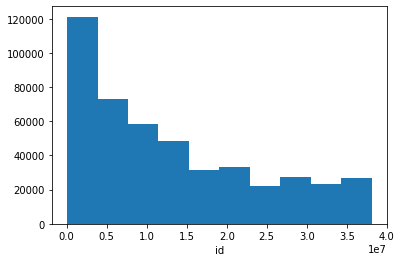

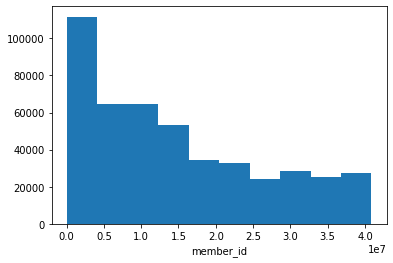

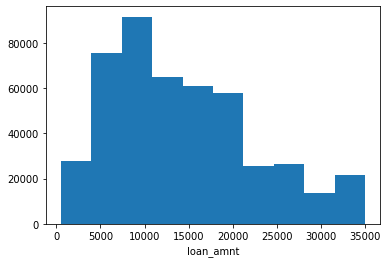

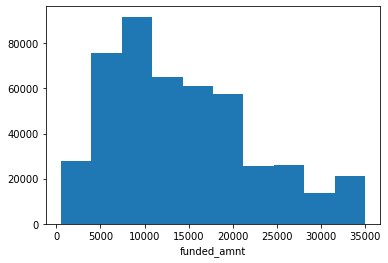

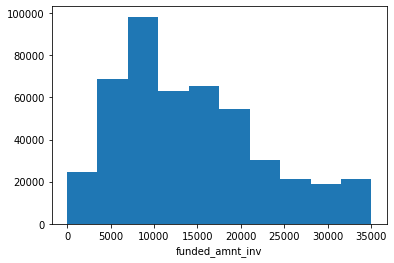

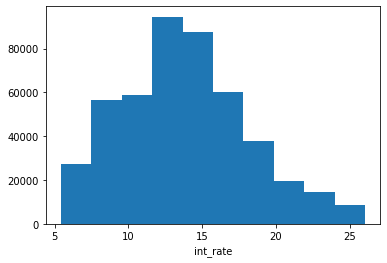

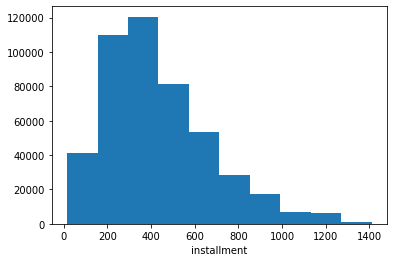

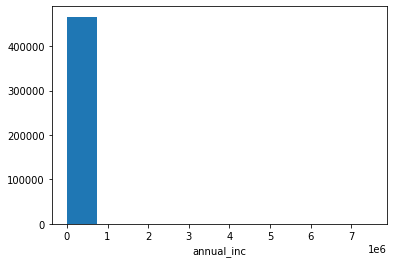

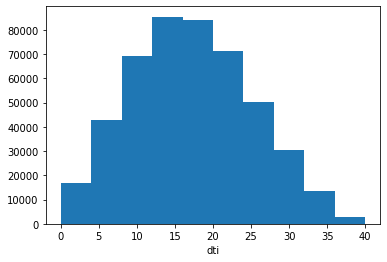

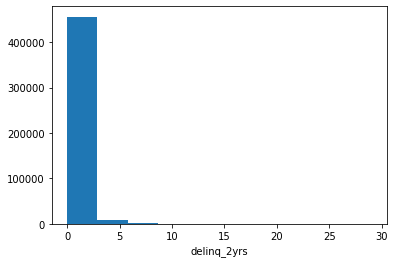

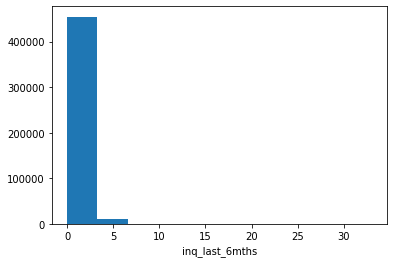

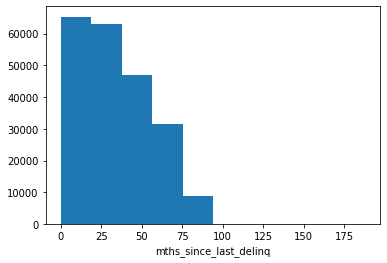

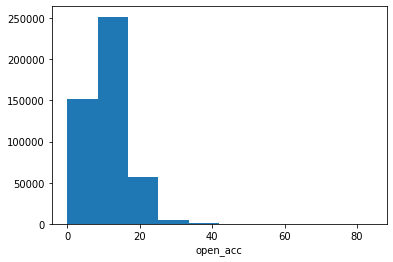

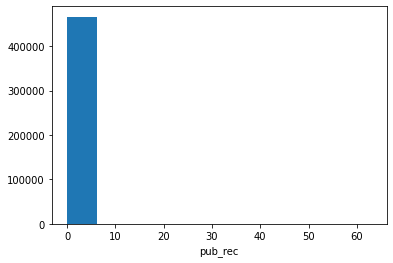

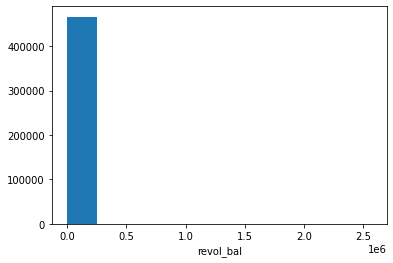

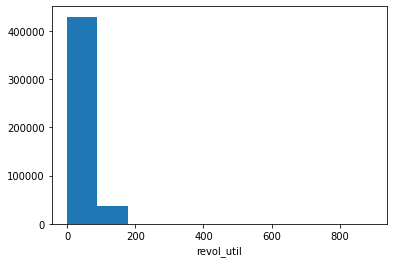

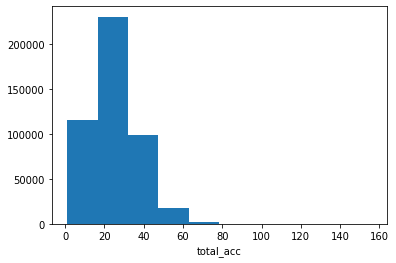

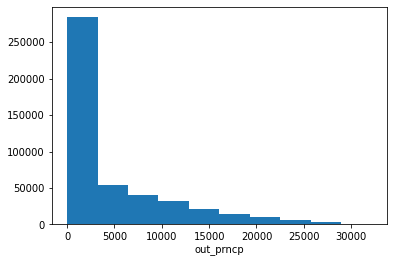

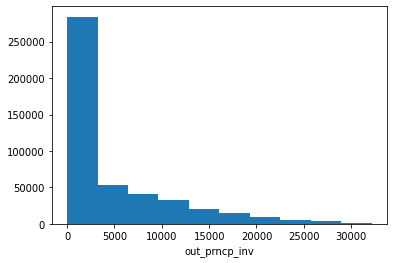

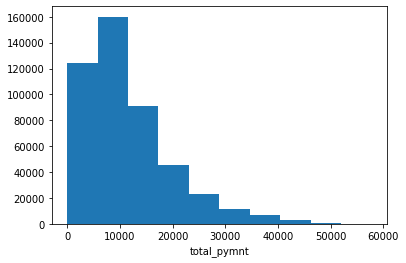

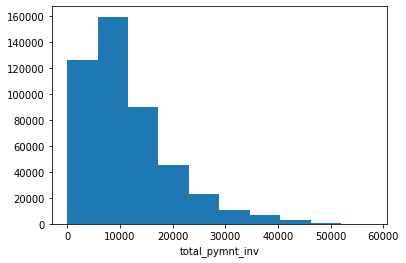

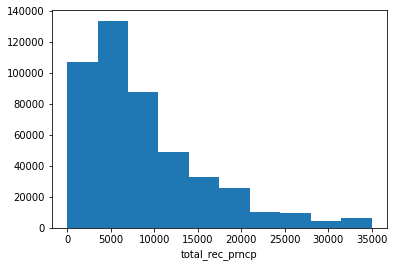

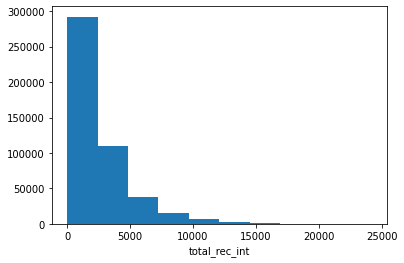

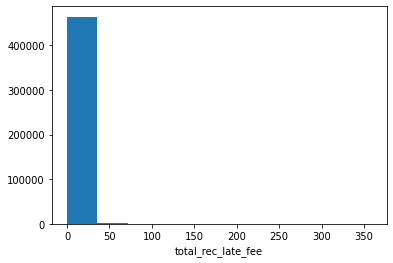

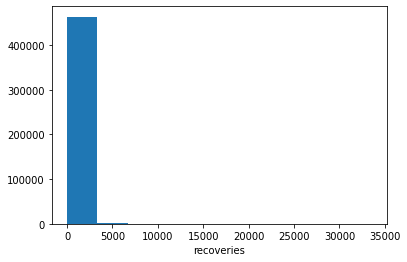

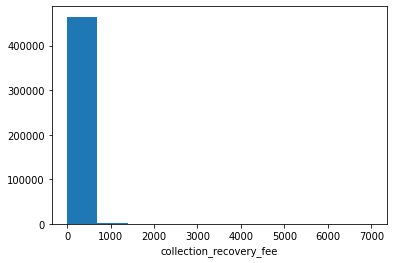

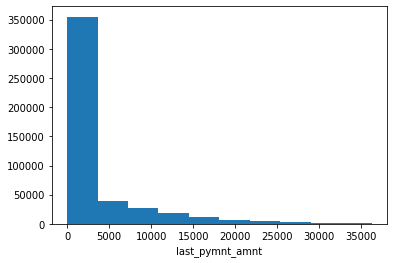

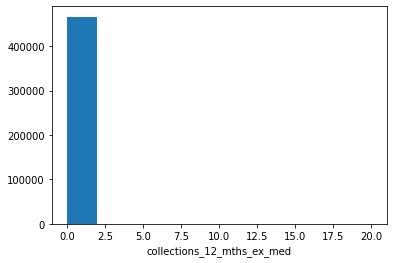

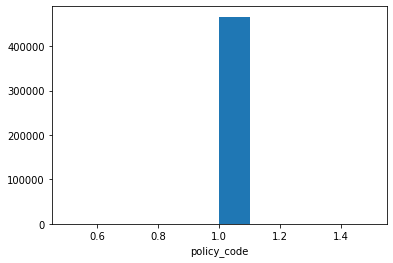

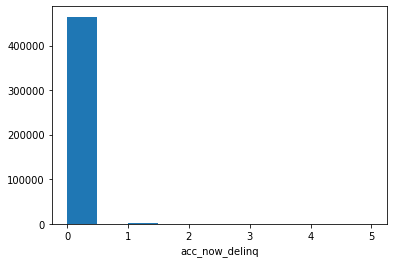

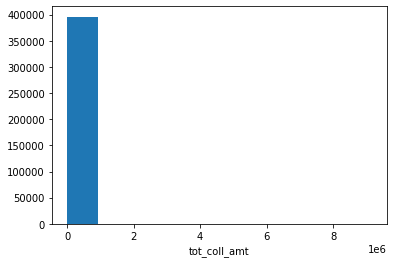

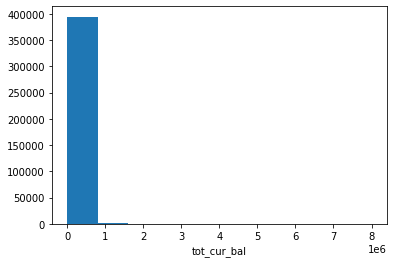

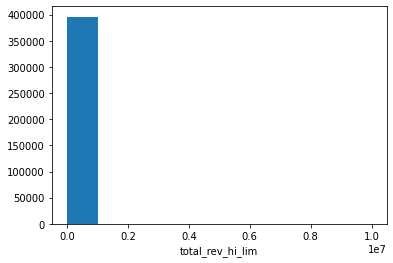

In [18]:
for col in new_data.columns.values :
  if (new_data[col].dtype == "int64")  | (new_data[col].dtype == "float64" ) :
    plt.hist(new_data[col])
    plt.xlabel(col)
    plt.show()

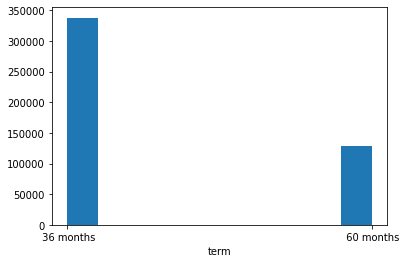

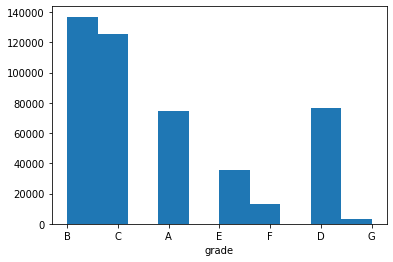

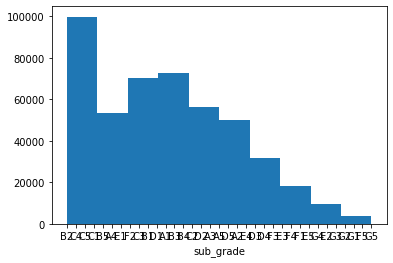

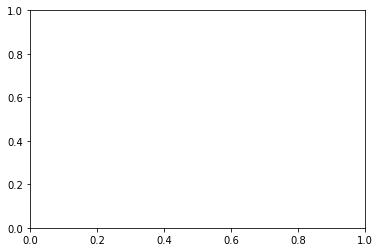

In [19]:
for col in new_data.columns.values :
  try:
    if (new_data[col].dtype == "object") :
      plt.hist(new_data[col])
      plt.xlabel(col)
      plt.show()
  except :
    continue

$\text{Dropping columns which are not much informative with respect to our prediction or which have very less variations in them or does not have much good spread.}$

In [20]:
new_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [21]:
new_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


Removing columns that have :

1. 19 features with more than 75% of missing values.Any technique to impute them will result in inaccurate results

2. Certain static features not related to credit risk, e.g., id, member_id, url, title
3. Other forward-looking features that are expected to be populated only once the borrower has defaulted, e.g., recoveries, collection_recovery_fee

In [22]:
new_data.drop(columns = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d','recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'  , 'application_type'] , inplace=True)

In [23]:
print("The shape of data after dropping unnecessary columns : " , new_data.shape)

The shape of data after dropping unnecessary columns :  (466285, 41)


In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_length                  445277 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  issue_d                     466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13  pymnt_plan    

In [25]:
for col in new_data.columns :
  if new_data[col].dtype == "object" :
    unique = pd.unique(new_data[col])
    if len(unique) < 15 :
      print("column " + col + " has " +str(len(unique)) + " unique values and they are :\n " + str(unique))
    else :
      print(col + str(len(unique)) + " values")


column term has 2 unique values and they are :
 [' 36 months' ' 60 months']
column grade has 7 unique values and they are :
 ['B' 'C' 'A' 'E' 'F' 'D' 'G']
column emp_length has 12 unique values and they are :
 ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
column home_ownership has 6 unique values and they are :
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
column verification_status has 3 unique values and they are :
 ['Verified' 'Source Verified' 'Not Verified']
issue_d91 values
column loan_status has 9 unique values and they are :
 ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
column pymnt_plan has 2 unique values and they are :
 ['n' 'y']
column purpose has 14 unique values and they are :
 ['credit_card' 'car' 'small_business' 'other' 'wedd

#Creating target variable

In [26]:
new_data['loan_status'].value_counts(normalize = True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

$\text{Customers are not considered good for business if they have status as either: Late (31-120 days), Default , Does not meet the credit policy, Status:Charged Off ,Charged Off}$
$\text{We encode such customers with 0 and others as 1 and make a new column of targets as good or bad customer.}$



In [27]:
new_data["good_bad"] = np.where(new_data.loc[:,'loan_status'].isin(['Charged Off' ,'Late (31-120 days)' ,'Default' , 'Does not meet the credit policy. Status:Charged Off']) , 0 , 1)

In [28]:
new_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,861.07,Jan-15,171.62,Jan-16,0.0,1,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,435.17,Apr-13,119.66,Sep-13,0.0,1,0.0,NaN,NaN,NaN,0


In [29]:
new_data.drop(columns = 'loan_status' , inplace =True , axis = 1)

In [30]:
new_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,861.07,Jan-15,171.62,Jan-16,0.0,1,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,435.17,Apr-13,119.66,Sep-13,0.0,1,0.0,NaN,NaN,NaN,0


#Test-Train Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
labels = new_data["good_bad"]
train_data = new_data.drop(columns = 'good_bad' , axis = 1)
labels

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

In [33]:
X_train , X_test , Y_train , Y_test = train_test_split(train_data , labels , test_size = 0.33 , random_state = 42 ,stratify= labels)

In [34]:
X_train,X_test = X_train.copy() , X_test.copy()
print("shape of X_train : " , X_train.shape)
print("shape of X_test : " , X_test.shape)
print("shape of Y_train : " , Y_train.shape)
print("shape of Y_test : " , Y_test.shape)

shape of X_train :  (312410, 40)
shape of X_test :  (153875, 40)
shape of Y_train :  (312410,)
shape of Y_test :  (153875,)


#Encoding Categorical variables

In [35]:
dummy = pd.DataFrame()
for col in X_train.columns :
  if X_train[col].dtype == "object" :
    #print(col)
    dummy[col] = X_train[col]
dummy.head(3)

,term,grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d
185186,36 months,B,10+ years,MORTGAGE,Verified,Nov-12,n,debt_consolidation,IL,May-00,f,Oct-14,Jan-16
156543,36 months,A,3 years,MORTGAGE,Not Verified,Mar-13,n,credit_card,VA,Feb-94,f,Jun-14,Jan-16
8458,36 months,A,10+ years,OWN,Not Verified,Sep-11,n,debt_consolidation,FL,Jan-93,f,Sep-14,Jan-16


We have four columns containing date that can be encoded using number of days since today.term column has only 2 values and can be encoded as 0,1 or left as it is.The emp_length column has 12 unique categorical values and can be encoded as below.

In [36]:
print(pd.unique(dummy.emp_length))

['10+ years' '3 years' nan '< 1 year' '6 years' '4 years' '8 years'
 '7 years' '9 years' '2 years' '1 year' '5 years']


So emp_length have 12 unique values of years.We can convert these values into numeric values indicating years instead of strings. We will use pandas str.replace for converting these string to numeric.

In [37]:
#Handling string data
def emp_length2num(data , col) :
  """
  This function converts the string data into numerical data for columns ( here emp_length column) in dataframe

  """
  data[col] = data[col].str.replace('\+ years', '') #converting value 10+ years to 10
  data[col] = data[col].str.replace('< 1 year', str(0))
  data[col] = data[col].str.replace(' years', '') #converting values like 3 years/6 years/4 years/8 years ... etc to 3/6/4/8 respectively
  data[col] = data[col].str.replace(' year', '')
  data[col] = pd.to_numeric(data[col])
  data[col].fillna(value = 0 , inplace = True) #filling nan values with 0
  return data
#dqf = emp_length2num(dummy , 'emp_length')
#print(pd.unique(dqf.emp_length))

In [38]:
def convert_date2months(data , col) :
  """
  This function will convert the dates in column to number of months since day of running this code
  """
  from datetime import date
  today = pd.to_datetime(date.today()) #to get counts till date of today
  data[col] = pd.to_datetime(data[col] , format = '%b-%y') #convert date in columns to datetime
  data['months_since_' + col] = round(pd.to_numeric((today - data[col])/ np.timedelta64(1 , 'M'))) #Get months since todays date
  data['months_since_' + col] = data['months_since_' + col].apply(lambda x: data['months_since_' + col].max() if x < 0 else x) #removing any date that may have negative values due to misiing values
  data.drop(columns = [col] , inplace = True) #removing the column after getting the number of months since todays date
  return data


In [39]:
#The column term have only 2 unique values and they are in form of month in type string
#converting them to numeric 
def convert_term(data , col) :
  """
  The column term have only 2 unique values and they are in form of month in type string , converting them to numeric 
  """
  data[col] = data[col].str.replace(' months','')
  return data

In [40]:
dummy.head(2)

,term,grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d
185186,36 months,B,10+ years,MORTGAGE,Verified,Nov-12,n,debt_consolidation,IL,May-00,f,Oct-14,Jan-16
156543,36 months,A,3 years,MORTGAGE,Not Verified,Mar-13,n,credit_card,VA,Feb-94,f,Jun-14,Jan-16


In [41]:
X_train = convert_term(X_train , 'term')
X_train = convert_date2months(X_train , 'issue_d')
X_train = convert_date2months(X_train , 'earliest_cr_line' )
X_train = convert_date2months(X_train , 'last_pymnt_d' )
X_train = convert_date2months(X_train , 'last_credit_pull_d')
X_train = emp_length2num(X_train , 'emp_length')

In [42]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d
185186,12000,12000,12000.0,36,13.11,404.97,B,10.0,MORTGAGE,36000.0,Verified,n,debt_consolidation,IL,23.83,0.0,3.0,NaN,11.0,0.0,14438,40.2,18.0,f,0.00,0.00,14232.08638,14232.09,2232.09,5331.15,0.0,1,0.0,0.0,145453.0,35900.0,105.0,255.0,82.0,67.0
156543,10000,10000,10000.0,36,7.62,311.62,A,3.0,MORTGAGE,68500.0,Not Verified,n,credit_card,VA,9.69,0.0,0.0,NaN,10.0,0.0,15279,41.4,32.0,f,0.00,0.00,10779.05798,10779.06,779.06,6435.30,0.0,1,0.0,0.0,241715.0,36900.0,101.0,330.0,86.0,67.0
8458,17875,17875,17875.0,36,6.99,551.85,A,10.0,OWN,30000.0,Not Verified,n,debt_consolidation,FL,20.32,0.0,0.0,NaN,6.0,0.0,10722,23.2,15.0,f,0.00,0.00,19865.49010,19865.49,1990.49,558.86,0.0,1,0.0,NaN,NaN,NaN,119.0,343.0,83.0,67.0
349393,14100,14100,14100.0,36,13.98,481.77,C,10.0,MORTGAGE,49000.0,Not Verified,n,debt_consolidation,CO,20.74,1.0,1.0,16.0,11.0,0.0,10034,52.0,18.0,f,7782.22,7782.22,8671.86000,8671.86,2354.08,481.77,0.0,1,0.0,0.0,158103.0,19300.0,85.0,229.0,67.0,67.0
253733,35000,35000,35000.0,60,13.66,808.24,C,0.0,MORTGAGE,97000.0,Source Verified,n,debt_consolidation,FL,26.87,2.0,0.0,14.0,30.0,0.0,51403,67.3,48.0,w,28817.99,28817.99,11288.80000,11288.80,5106.79,808.24,0.0,1,0.0,0.0,298109.0,74300.0,81.0,474.0,67.0,67.0


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312410 entries, 185186 to 38736
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   loan_amnt                        312410 non-null  int64  
 1   funded_amnt                      312410 non-null  int64  
 2   funded_amnt_inv                  312410 non-null  float64
 3   term                             312410 non-null  object 
 4   int_rate                         312410 non-null  float64
 5   installment                      312410 non-null  float64
 6   grade                            312410 non-null  object 
 7   emp_length                       312410 non-null  float64
 8   home_ownership                   312410 non-null  object 
 9   annual_inc                       312408 non-null  float64
 10  verification_status              312410 non-null  object 
 11  pymnt_plan                       312410 non-null  object 
 12

In [58]:
for col in X_train.columns :
  if X_train[col].dtype == "object" :
    unique = pd.unique(X_train[col])
    if 2 < len(unique) < 15 :
      print("column " + col + " has " +str(len(unique)) + " unique values and they are :\n " + str(unique))
    else :
      print(col + ' has ' + str(len(unique)) + " values")

term has 2 values
column grade has 7 unique values and they are :
 ['B' 'A' 'C' 'E' 'D' 'G' 'F']
column home_ownership has 5 unique values and they are :
 ['MORTGAGE' 'OWN' 'RENT' 'OTHER' 'NONE']
column verification_status has 3 unique values and they are :
 ['Verified' 'Not Verified' 'Source Verified']
pymnt_plan has 2 values
column purpose has 14 unique values and they are :
 ['debt_consolidation' 'credit_card' 'home_improvement' 'major_purchase'
 'other' 'moving' 'small_business' 'car' 'house' 'medical' 'vacation'
 'wedding' 'educational' 'renewable_energy']
addr_state has 50 values
initial_list_status has 2 values


#Feature Selection

$\text{We will perform chi-squared test for categorical features and ANOVA F-statistic for numeric features, For selecting most suitable features from the datasets}$

$\text{For performing the above mention tests on data we will separate the categorical features from numeric features.}$

In [63]:
X_train_obj = X_train.select_dtypes(include= 'object').copy() #creating copy so that original data is not harmed
X_train_num = X_train.select_dtypes(include='number').copy() #creating copy so that original data is not harmed

In [59]:
from sklearn.feature_selection import f_classif #to perform ANOVA F-statistic
from scipy.stats import chi2_contingency #to perform chi-square test

In [75]:
def chi_test(data) :
  """ Perform chi-square test for data """

  chi_test = {} #to store p value of each feature

  for col in X_train_obj.columns :
    chi2 , p , dos , exp_freq = chi2_contingency(pd.crosstab(Y_train , X_train_obj[col])) 
    #crosstab gives frequency table of given factors by cross tabulation
    #chi2_contingency returns 4 values i.e. chi2 : test statistic , p : p alue of test , dof : degree of freedom , exp_freq : expected frequency
    chi_test.setdefault('feature',[]).append(col)
    chi_test.setdefault('p-value',[]).append(round(p,5))
    results = pd.DataFrame()
  return chi_test



' Perform chi-square test for data '